In [1]:
!pip install chart_studio

In [2]:
#!pip3 install --upgrade plotly

In [3]:
#pip install -U kaleido

In [44]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,643 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155332 files and d

In [46]:
# Setup
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.io as pio

from wordcloud import WordCloud

# for time series
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
timeage = pd.read_csv("/content/drive/MyDrive/colab/covid/archive/TimeAge.csv")
region = pd.read_csv("/content/drive/MyDrive/colab/covid/archive/Region.csv")
time = pd.read_csv("/content/drive/MyDrive/colab/covid/archive/Time.csv")
weather = pd.read_csv("/content/drive/MyDrive/colab/covid/archive/Weather.csv")
searchtrend = pd.read_csv("/content/drive/MyDrive/colab/covid/archive/SearchTrend.csv")
timeprovince = pd.read_csv("/content/drive/MyDrive/colab/covid/archive/TimeProvince.csv")
timegender = pd.read_csv("/content/drive/MyDrive/colab/covid/archive/TimeGender.csv")
patientinfo = pd.read_csv("/content/drive/MyDrive/colab/covid/archive/PatientInfo.csv")
case = pd.read_csv("/content/drive/MyDrive/colab/covid/archive/Case.csv")
stat = pd.read_csv("/content/drive/MyDrive/colab/covid/archive/stat.csv")

In [7]:
stat.head()

,Unnamed: 0,지역,인구,인구밀도
0,0,서울,"9,602","15,865"
1,1,부산,"3,344","4,342"
2,2,대구,"2,419","2,738"
3,3,인천,"2,951","2,770"
4,4,광주,"1,488","2,969"


In [8]:
stat['지역']

0     서울
1     부산
2     대구
3     인천
4     광주
5     대전
6     울산
7     세종
8     경기
9     강원
10    충북
11    충남
12    전북
13    전남
14    경북
15    경남
16    제주
Name: 지역, dtype: object

In [9]:
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [10]:
patientinfo.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [11]:
patientinfo[patientinfo.age.isnull()]

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
563,1000000564,NaN,NaN,Korea,Seoul,Jungnang-gu,etc,NaN,NaN,NaN,2020-04-06,NaN,NaN,released
564,1000000565,NaN,NaN,Korea,Seoul,Seongdong-gu,overseas inflow,NaN,NaN,NaN,2020-04-06,NaN,NaN,released
565,1000000566,NaN,NaN,Korea,Seoul,Gwanak-gu,overseas inflow,NaN,NaN,NaN,2020-04-06,NaN,NaN,released
566,1000000567,NaN,NaN,Korea,Seoul,Gangnam-gu,overseas inflow,NaN,NaN,NaN,2020-04-06,NaN,NaN,released
567,1000000568,NaN,NaN,Korea,Seoul,Nowon-gu,overseas inflow,NaN,NaN,NaN,2020-04-06,NaN,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,6100000130,NaN,NaN,Korea,Gyeongsangnam-do,Hapcheon-gun,overseas inflow,NaN,NaN,NaN,2020-06-15,NaN,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [12]:
patientinfo.dropna(subset=['age'],inplace=True)
patientinfo.age.isnull().any() # False = There are no null entries in the age column

False

In [13]:
patientinfo.age = [i.rsplit('s',1)[0] if 's' in i else i for i in patientinfo.age]
patientinfo.age = patientinfo.age.astype(int)

In [14]:
patientinfo.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [15]:
patientinfo.age.value_counts()

20     899
50     667
30     523
40     518
60     482
70     232
10     178
80     170
0       66
90      49
100      1
Name: age, dtype: int64

In [16]:
sort_age = patientinfo.age.value_counts()


sort_age=sort_age.sort_index()
print(sort_age.index)

Int64Index([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], dtype='int64')


In [17]:
patientinfo.province.value_counts()

Gyeongsangbuk-do     1246
Gyeonggi-do           830
Seoul                 584
Chungcheongnam-do     168
Busan                 149
Daegu                 137
Gyeongsangnam-do      129
Daejeon               119
Incheon                92
Gangwon-do             61
Chungcheongbuk-do      56
Ulsan                  53
Sejong                 51
Gwangju                44
Jeollabuk-do           26
Jeollanam-do           25
Jeju-do                15
Name: province, dtype: int64

In [18]:
province = patientinfo.province.value_counts()

print(province)

Gyeongsangbuk-do     1246
Gyeonggi-do           830
Seoul                 584
Chungcheongnam-do     168
Busan                 149
Daegu                 137
Gyeongsangnam-do      129
Daejeon               119
Incheon                92
Gangwon-do             61
Chungcheongbuk-do      56
Ulsan                  53
Sejong                 51
Gwangju                44
Jeollabuk-do           26
Jeollanam-do           25
Jeju-do                15
Name: province, dtype: int64


In [19]:
df_age1020 = patientinfo[patientinfo['age'].isin([10,20])]
df_age1020

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3,1000000004,male,20,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
6,1000000007,male,20,Korea,Seoul,Jongno-gu,contact with patient,1000000003,0,NaN,2020-01-31,2020-02-10,NaN,released
7,1000000008,male,20,Korea,Seoul,etc,overseas inflow,NaN,0,NaN,2020-02-02,2020-02-24,NaN,released
11,1000000012,male,20,Korea,Seoul,etc,overseas inflow,NaN,0,NaN,2020-02-07,2020-02-27,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5153,7000000008,female,10,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-03-27,2020-04-12,NaN,released
5154,7000000009,female,20,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,14,NaN,2020-03-29,2020-04-28,NaN,released
5155,7000000010,female,20,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,18,NaN,2020-04-03,2020-04-21,NaN,released
5157,7000000012,female,20,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,9,NaN,2020-04-03,2020-05-05,NaN,released


In [20]:
df_age_over_60 = patientinfo[patientinfo['age'].isin([60,70,80,90,100])]
df_age_over_60

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
9,1000000010,female,60,Korea,Seoul,Seongbuk-gu,contact with patient,1000000003,6,NaN,2020-02-05,2020-02-29,NaN,released
12,1000000013,male,80,Korea,Seoul,Jongno-gu,contact with patient,1000000017,117,NaN,2020-02-16,NaN,NaN,deceased
13,1000000014,female,60,Korea,Seoul,Jongno-gu,contact with patient,1000000013,27,2020-02-06,2020-02-16,2020-03-12,NaN,released
14,1000000015,male,70,Korea,Seoul,Seongdong-gu,Seongdong-gu APT,NaN,8,2020-02-11,2020-02-19,NaN,NaN,released
15,1000000016,male,70,Korea,Seoul,Jongno-gu,contact with patient,1000000017,NaN,NaN,2020-02-19,2020-03-11,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,6100000100,female,60,Korea,Gyeongsangnam-do,Jinju-si,etc,6100000097,NaN,2020-03-28,2020-03-31,NaN,NaN,released
5116,6100000104,female,70,Korea,Gyeongsangnam-do,Sancheong-gun,etc,6100000097,NaN,2020-03-26,2020-03-31,NaN,NaN,released
5124,6100000112,male,60,Korea,Gyeongsangnam-do,Hapcheon-gun,contact with patient,6100000100,NaN,2020-04-03,2020-04-07,NaN,NaN,released
5128,6100000116,male,60,Korea,Gyeongsangnam-do,Changwon-si,etc,NaN,NaN,2020-04-20,2020-04-21,2020-05-15,NaN,released


In [21]:
df_age1020_count = df_age1020.province.value_counts()
df_age1020_count

Gyeongsangbuk-do     366
Gyeonggi-do          217
Seoul                192
Busan                 63
Gyeongsangnam-do      37
Daegu                 32
Chungcheongnam-do     31
Daejeon               27
Ulsan                 22
Incheon               17
Gwangju               14
Gangwon-do            14
Chungcheongbuk-do     13
Jeollabuk-do          11
Jeju-do                9
Jeollanam-do           8
Sejong                 4
Name: province, dtype: int64

In [22]:
df_age_over_60_count = df_age_over_60.province.value_counts()
df_age_over_60_count

Gyeongsangbuk-do     411
Gyeonggi-do          180
Seoul                 85
Daegu                 45
Daejeon               43
Busan                 30
Gyeongsangnam-do      30
Chungcheongnam-do     28
Incheon               18
Gangwon-do            18
Gwangju               13
Chungcheongbuk-do     12
Jeollabuk-do           7
Jeollanam-do           7
Ulsan                  6
Sejong                 1
Name: province, dtype: int64

In [23]:
age_over1020_infection_case = df_age1020.infection_case.value_counts()
age_over1020_infection_case

overseas inflow                    306
contact with patient               245
etc                                144
Shincheonji Church                  44
Onchun Church                       21
Guro-gu Call Center                 15
Itaewon Clubs                       13
Dongan Church                        9
Coupang Logistics Center             5
Seongdong-gu APT                     4
Milal Shelter                        3
Changnyeong Coin Karaoke             3
Eunpyeong St. Mary's Hospital        2
gym facility in Sejong               1
gym facility in Cheonan              1
River of Grace Community Church      1
Cheongdo Daenam Hospital             1
Name: infection_case, dtype: int64

In [24]:
patientinfo.infection_case.value_counts()

contact with patient                     1112
overseas inflow                           653
etc                                       638
Guro-gu Call Center                       112
Shincheonji Church                        103
Onchun Church                              33
Bonghwa Pureun Nursing Home                31
gym facility in Cheonan                    30
Ministry of Oceans and Fisheries           28
Itaewon Clubs                              26
Coupang Logistics Center                   24
Cheongdo Daenam Hospital                   21
Dongan Church                              17
Eunpyeong St. Mary's Hospital              16
Gyeongsan Seorin Nursing Home              15
Seongdong-gu APT                           13
Dunsan Electronics Town                    13
Gyeongsan Jeil Silver Town                 12
Milal Shelter                              11
Gyeongsan Cham Joeun Community Center      10
Orange Town                                 7
Geochang Church                   

## 연령대 별 확진자 그래프(아래)

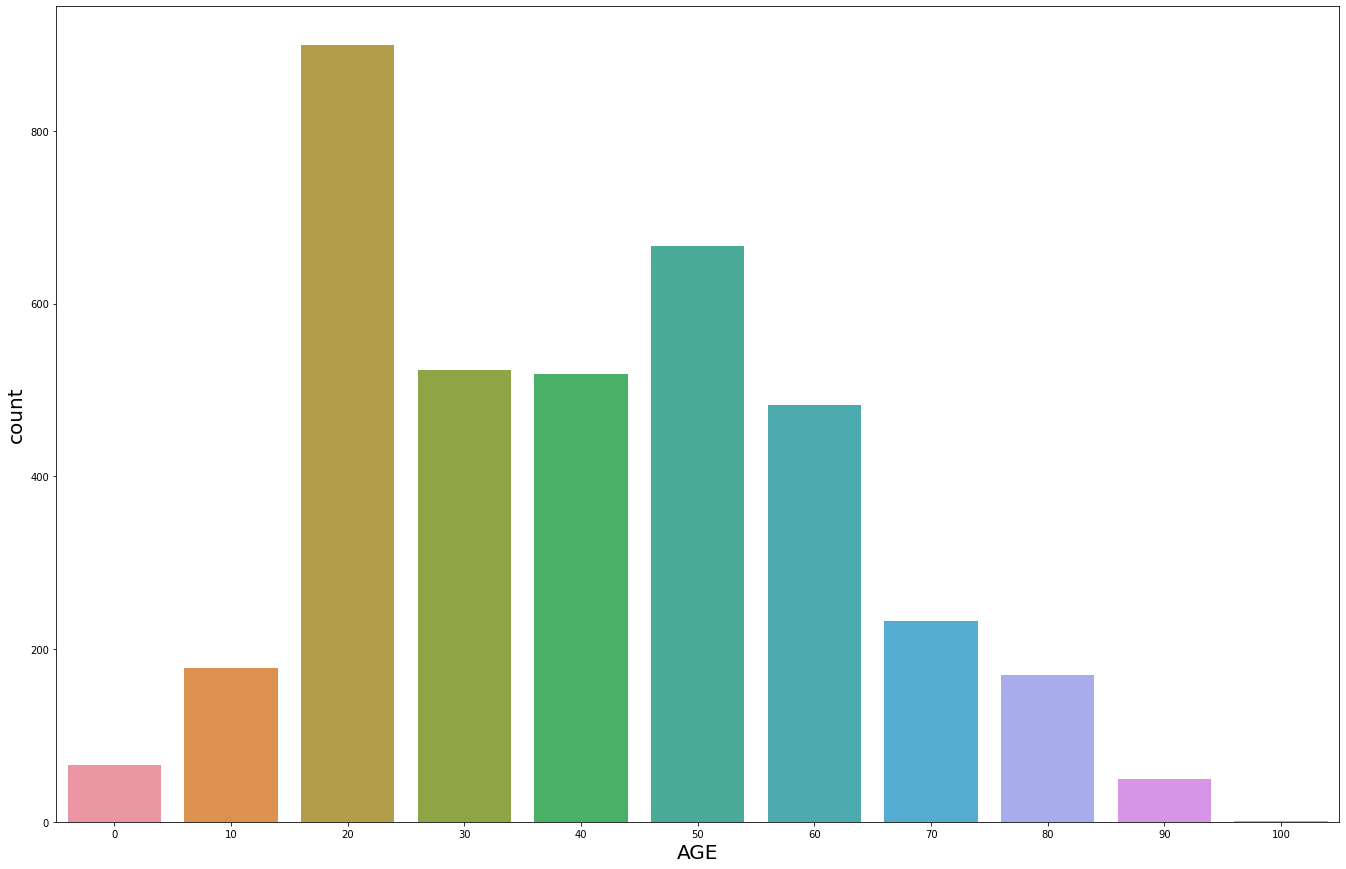

0       66
10     178
20     899
30     523
40     518
50     667
60     482
70     232
80     170
90      49
100      1
Name: age, dtype: int64


In [25]:
f,ax = plt.subplots(figsize = (23,15))
ax = sns.barplot(x=sort_age.index, y= sort_age.values,data=patientinfo)
plt.xlabel("AGE",fontsize = 20)
plt.ylabel("count",fontsize = 20)
plt.show()
print(sort_age)

In [26]:
timeage.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [27]:
timeage.age = [i.rsplit('s',1)[0] if 's' in i else i for i in timeage.age] # 나이에서 s 제거

In [28]:
timeage.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0,32,0
1,2020-03-02,0,10,169,0
2,2020-03-02,0,20,1235,0
3,2020-03-02,0,30,506,1
4,2020-03-02,0,40,633,1


## 전체 확진자의 거주지역 그래프(아래)

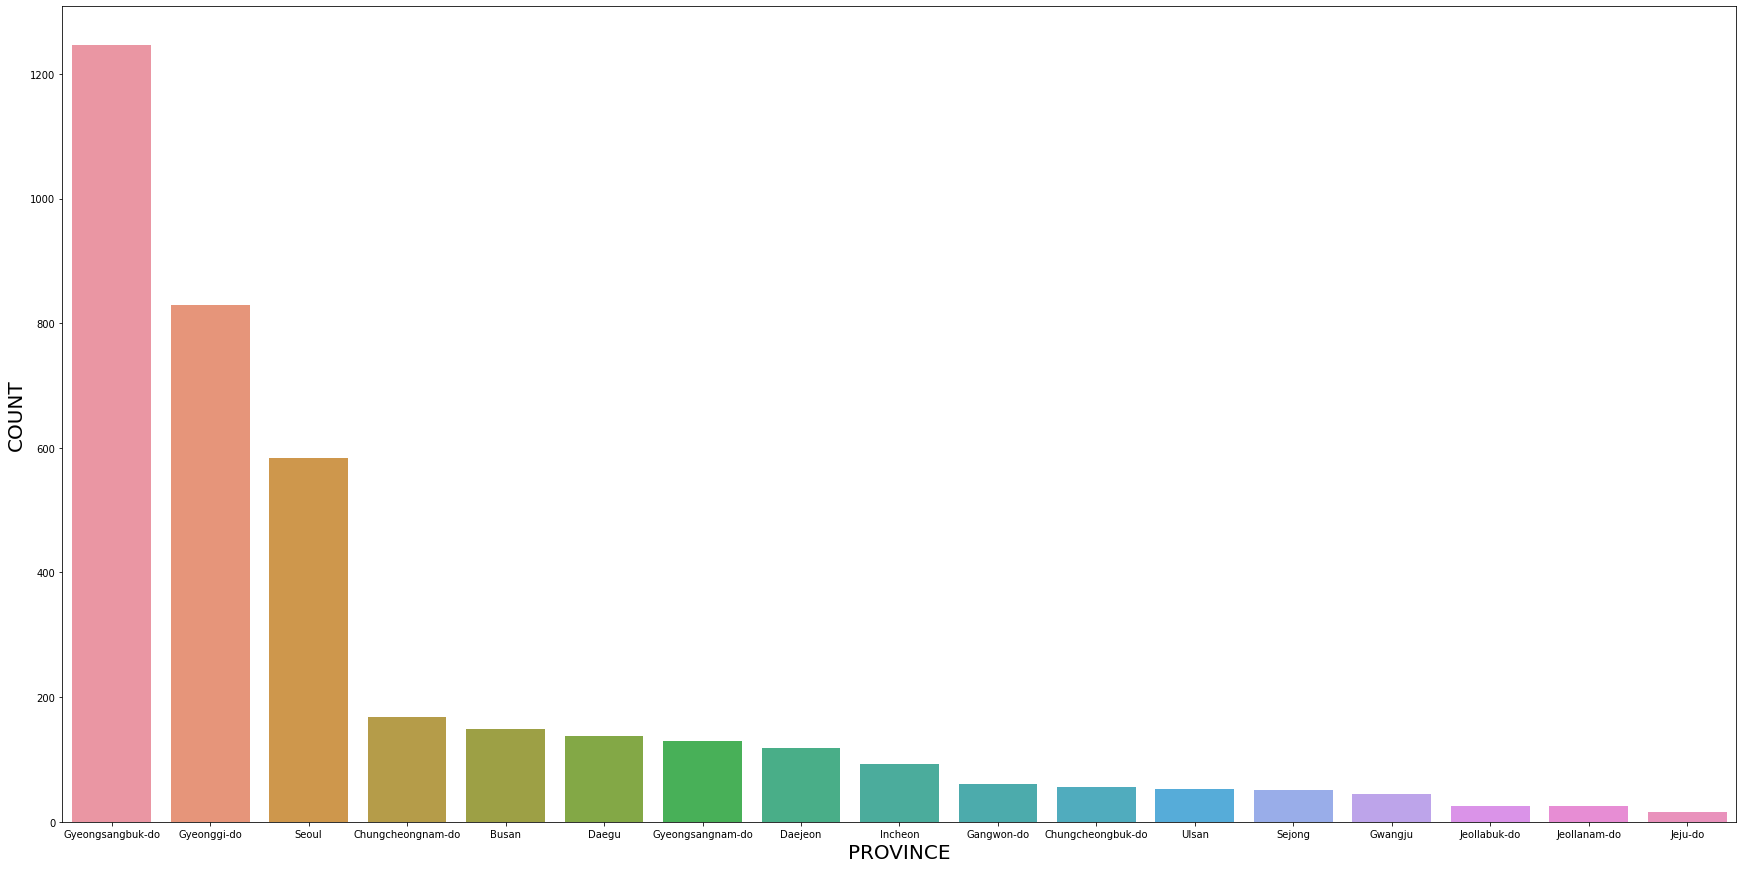

Gyeongsangbuk-do     1246
Gyeonggi-do           830
Seoul                 584
Chungcheongnam-do     168
Busan                 149
Daegu                 137
Gyeongsangnam-do      129
Daejeon               119
Incheon                92
Gangwon-do             61
Chungcheongbuk-do      56
Ulsan                  53
Sejong                 51
Gwangju                44
Jeollabuk-do           26
Jeollanam-do           25
Jeju-do                15
Name: province, dtype: int64


In [29]:
f,ax = plt.subplots(figsize = (30,15))
ax = sns.barplot(x=province.index, y=province.values,data=patientinfo)
plt.xlabel("PROVINCE",fontsize = 20)
plt.ylabel("COUNT",fontsize = 20)
plt.show()
print(province)
# 

## 10대,20대 확진자의 거주지역 그래프(아래)

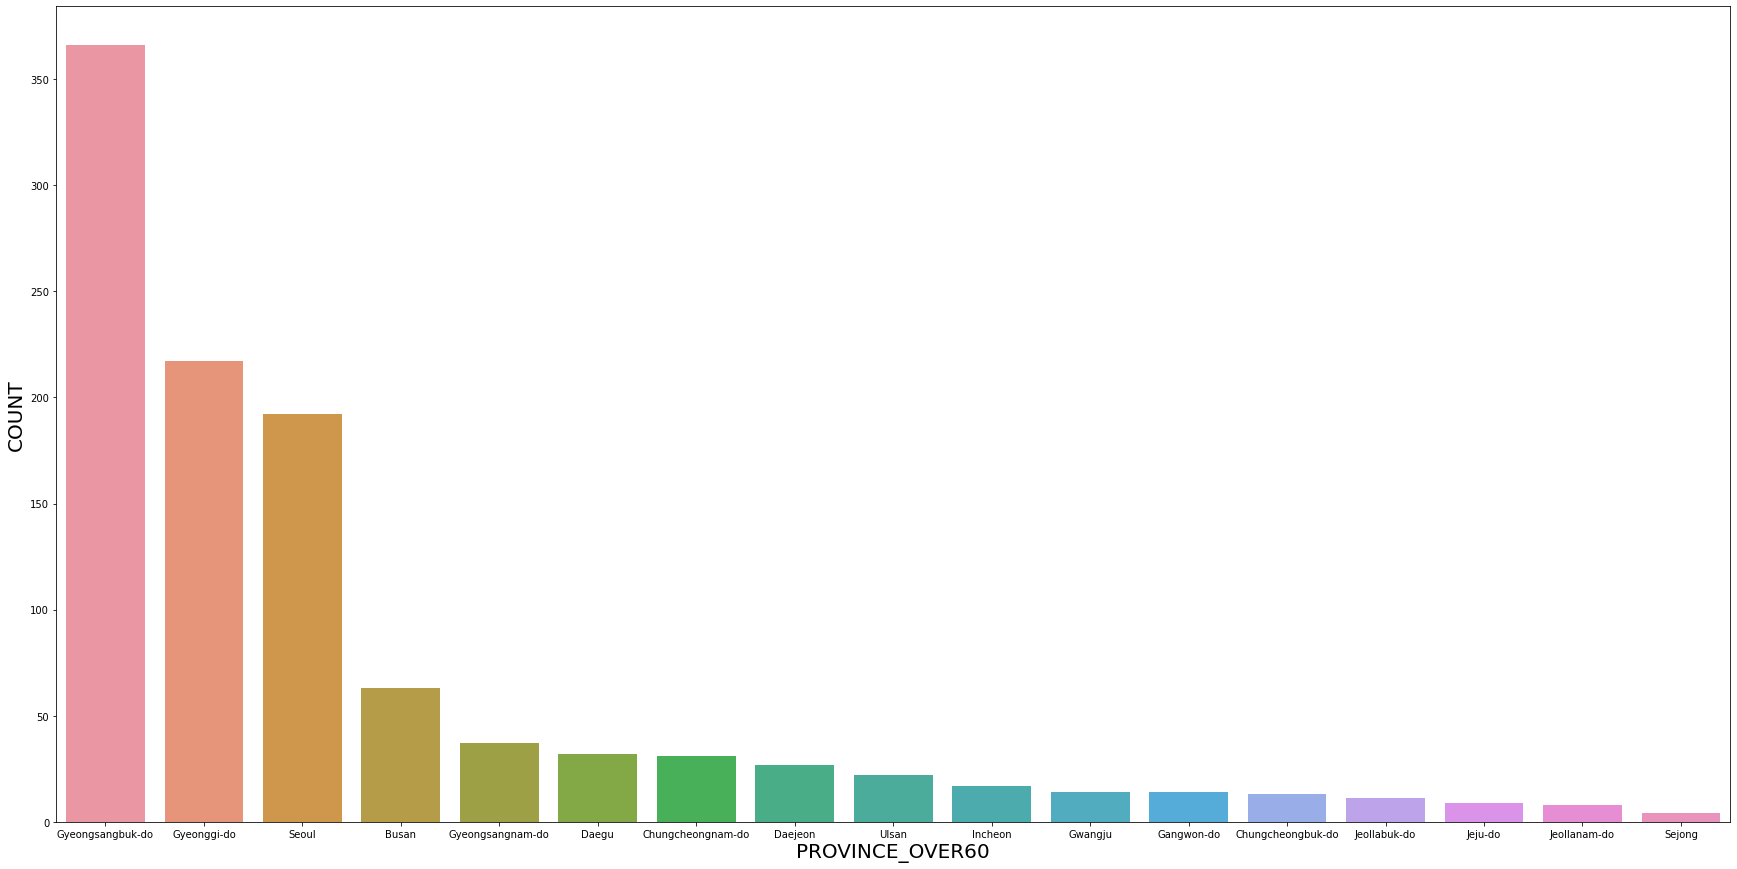

Gyeongsangbuk-do     366
Gyeonggi-do          217
Seoul                192
Busan                 63
Gyeongsangnam-do      37
Daegu                 32
Chungcheongnam-do     31
Daejeon               27
Ulsan                 22
Incheon               17
Gwangju               14
Gangwon-do            14
Chungcheongbuk-do     13
Jeollabuk-do          11
Jeju-do                9
Jeollanam-do           8
Sejong                 4
Name: province, dtype: int64


In [48]:
f,ax = plt.subplots(figsize = (30,15))
ax = sns.barplot(x=df_age1020_count.index, y=df_age1020_count.values,data=patientinfo)
plt.xlabel("PROVINCE_OVER60",fontsize = 16)
plt.ylabel("COUNT",fontsize = 16)
plt.show()
print(df_age1020_count)

## 60대 이상의 확진자 거주지역 그래프(아래)

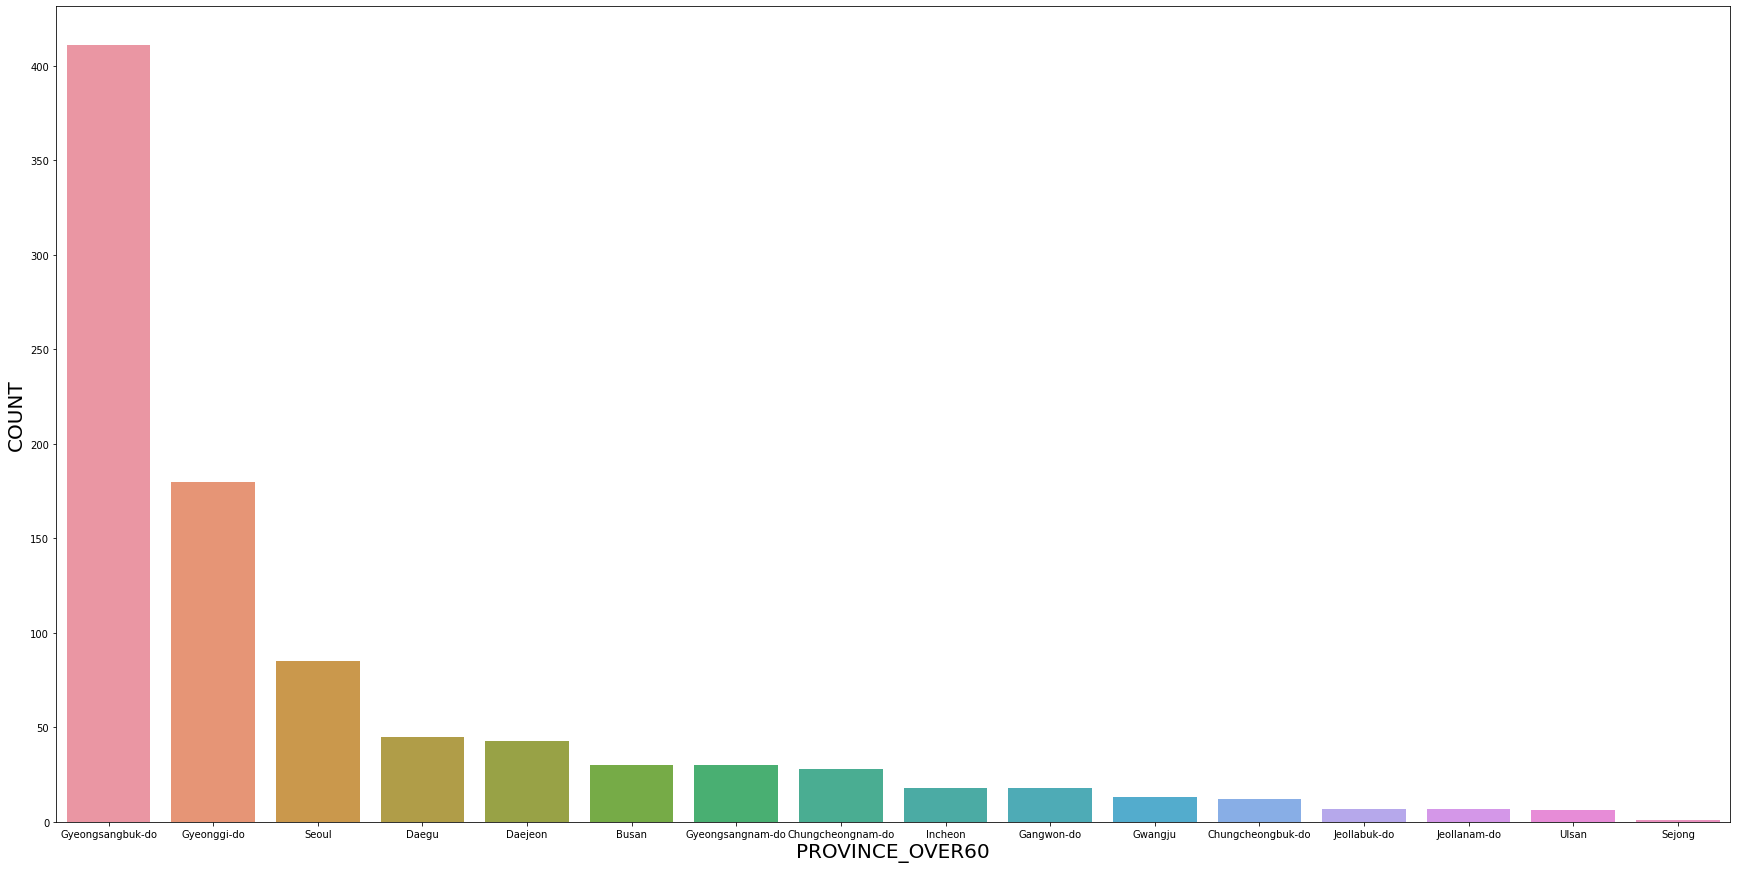

Gyeongsangbuk-do     411
Gyeonggi-do          180
Seoul                 85
Daegu                 45
Daejeon               43
Busan                 30
Gyeongsangnam-do      30
Chungcheongnam-do     28
Incheon               18
Gangwon-do            18
Gwangju               13
Chungcheongbuk-do     12
Jeollabuk-do           7
Jeollanam-do           7
Ulsan                  6
Sejong                 1
Name: province, dtype: int64


In [30]:
f,ax = plt.subplots(figsize = (30,15))
ax = sns.barplot(x=df_age_over_60_count.index, y=df_age_over_60_count.values,data=patientinfo)
plt.xlabel("PROVINCE_OVER60",fontsize = 20)
plt.ylabel("COUNT",fontsize = 20)
plt.show()
print(df_age_over_60_count)

## 전체 확진자와 1020, 60대이상 확진자의 거주지역 비교 그래프(아래)

In [53]:
fig=go.Figure()
fig.add_trace((go.Bar(x=province.index, y=province.values,
                    name="total")))
fig.add_trace((go.Bar(x=province.index, y=df_age1020_count.values,
                    name="1020")))
fig.add_trace((go.Bar(x=province.index, y=df_age_over_60_count.values,
                    name="OVER60")))
fig.update_layout(xaxis_title="PROVINCE",
                   yaxis_title="COUNT",
                   template="seaborn")
fig.show(renderer="colab")

![total,1020,60+](https://user-images.githubusercontent.com/96756158/157607738-ce241113-d578-4875-9da3-3f1703349c03.png)


## 10대 20대와 60대 이상 확진자의 거주지역 비교 그래프(아래)

In [55]:
fig=go.Figure()
fig.add_trace((go.Bar(x=df_age1020_count.index, y=df_age1020_count.values,
                    name="1020")))
fig.add_trace((go.Bar(x=df_age1020_count.index, y=df_age_over_60_count.values,
                    name="OVER60")))
fig.update_layout(xaxis_title="PROVINCE",
                   yaxis_title="COUNT",
                   template="seaborn")
fig.show(renderer="colab")

![1020,60+](https://user-images.githubusercontent.com/96756158/157607644-fa4597c7-ed1c-47b1-8efb-e65a85f278f3.png)

대부분의 경우 1020의 감염자 수와 노령층의 감염자수가 비슷하게 나타나는 경향을 보이지만 유독 서울만 1020의 감염자 수가 노령층의 감염자 수에 비해 높은 것을 볼 수 있고, 경상북도의 경우 노령층의 감염자 수가 1020에 비해 유의미하게 많은 것을 확인 할 수 있다.



## 전체 연령대 확진자의 감염케이스(아래)

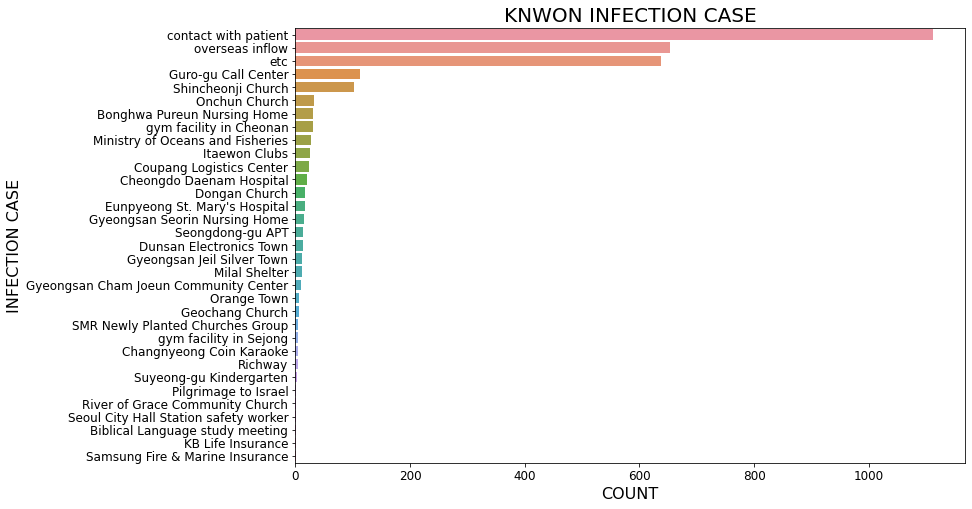

In [57]:
reason_order = list(patientinfo["infection_case"].value_counts().index)

plt.figure(figsize=(12, 8))
sns.countplot(y = "infection_case",
              data=patientinfo,
              order=reason_order)
plt.xlabel("COUNT", fontsize=16)
plt.ylabel("INFECTION CASE", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 10대,20대 확진자의 감염케이스(아래)

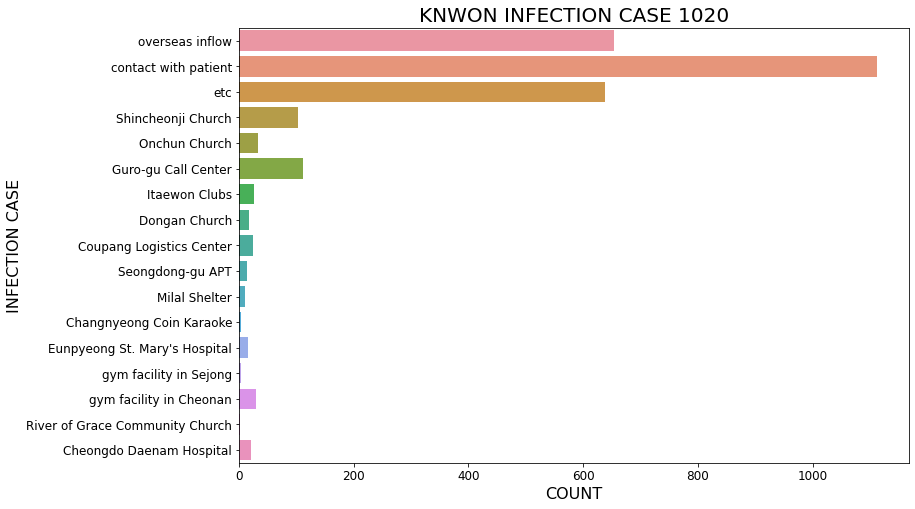

In [59]:
reason_order = list(df_age1020["infection_case"].value_counts().index)
plt.figure(figsize=(12, 8))
sns.countplot(y = "infection_case",
              data=patientinfo,
              order=reason_order)
plt.xlabel("COUNT", fontsize=16)
plt.ylabel("INFECTION CASE", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 60세 이상 확진자의 감염케이스(아래)

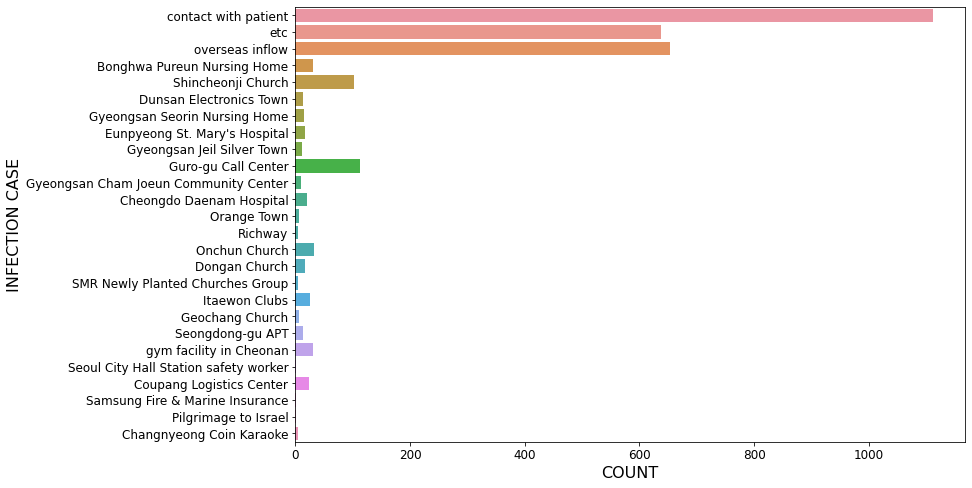

In [63]:
reason_order = list(df_age_over_60["infection_case"].value_counts().index)

plt.figure(figsize=(12, 8))
sns.countplot(y = "infection_case",
              data=patientinfo,
              order=reason_order)

plt.xlabel("COUNT", fontsize=16)
plt.ylabel("INFECTION CASE", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##10,20대와 60대 이상 확진자의 감염케이스 비교 그래프.(아래)

In [62]:
fig=go.Figure()

fig.add_trace((go.Bar(x=df_age_over_60["infection_case"].value_counts().index, y=df_age1020["infection_case"].value_counts(),
                    name="1020")))
fig.add_trace((go.Bar(x=df_age_over_60["infection_case"].value_counts().index, y=df_age_over_60["infection_case"].value_counts(),
                    name="OVER60")))
fig.update_layout(title="Accumulated test results over time",
                   xaxis_title="INFECTION_CASE",
                   yaxis_title="COUNT",
                   template="seaborn")
fig.show(renderer="colab")

![infection_case](https://user-images.githubusercontent.com/96756158/157607844-f8de75da-bd5f-41cf-bcdf-db94cabbb9ec.png)

확진자의 감염케이스를 1020과 노령인구를 비교해본 그래프이다. 가장 신기했던 점은 아무래도 이태원클럽의 감염케이스에 노인인구가 있는 것인데 아마도 클럽을 다녀온 20대와 접촉하여 감염된 사례가 아닌가 하는 생각이 들고, 요양원의 20대 감염자는 요양원에서 종사하는 10-20대나 요양원을 방문한 10-20대가 감염된 사례가 아닐까 하는 생각을 한다.

In [38]:
import folium
import math
# regions_point = region.drop(["", "test","negative", "confirmed", "released", "deceased"], axis=1)
#regions = regions.transpose(copy=True)
region_coordinates = pd.DataFrame({
                "latitude":[37.532600, 35.166668, 35.834236, 37.456257, 35.166668, 36.351002,
                      35.549999, 26.291321, 37.156000, 37.87472, 36.63722, 36.32139,
                      35.82194, 34.99014, 36.56556, 35.22806, 33.499621],
                "longitude": [127.024612, 129.066666, 128.534210, 126.705208,
                        126.916664, 127.385002, 129.316666, 127.165604, 127.006000,
                        127.73417, 127.48972, 127.41972, 127.14889, 126.47899, 128.725,
                        128.68111, 126.531188]}, 
                index=['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon',
                        'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
                        'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
                        'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'])

#regions = region_coordinates.join(regions, how="left")
marker_scale_factor = 0.2 # scale marker size based on number confirmed to the power of this factor
route_map = folium.Map(location=[36.5,128],
                       min_zoom=3,
                       max_zoom=10,
                       zoom_start=6.5,
                       tiles="cartodbpositron")

for lat, lon, date in zip(region["latitude"],
                          region["longitude"],
                          region.iloc[:, -1]): # iloc for last date
    folium.CircleMarker([lat, lon],
                  color="green",
                  radius=math.pow(date, marker_scale_factor),
                  fill=True,
                  fill_color="gray",
                  fill_opacity=0.2).add_to(route_map)
route_map
